In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [4]:
df.corr(method='pearson')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [5]:
X=df.drop(['diagnosis'],axis=1)

In [6]:
y=df['diagnosis']

In [7]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y=lb.fit_transform(y)
type(y)



numpy.ndarray

In [8]:
X.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64

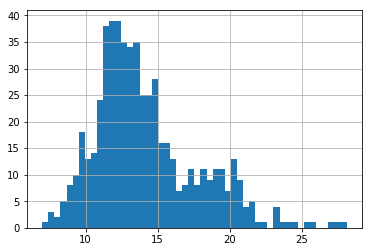

In [9]:
X['mean_radius'].hist(bins=50)

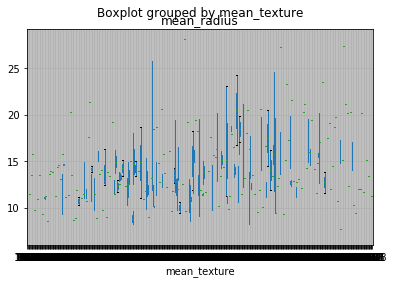

In [10]:
X.boxplot(column='mean_radius',by='mean_texture')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


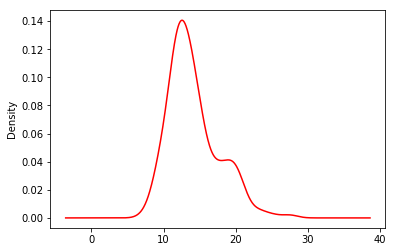

In [11]:
X['mean_radius'].plot('density',color='Red')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


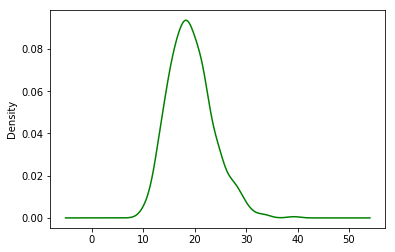

In [12]:
X['mean_texture'].plot('density',color='Green')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


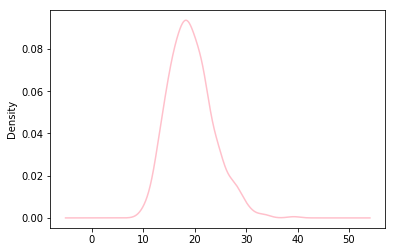

In [13]:
X['mean_texture'].plot('density',color='Pink')

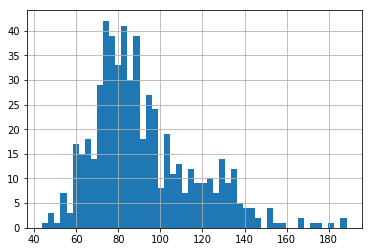

In [14]:
X['mean_perimeter'].hist(bins=50)

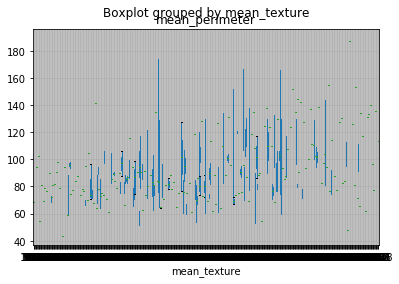

In [15]:
X.boxplot(column='mean_perimeter',by='mean_texture')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


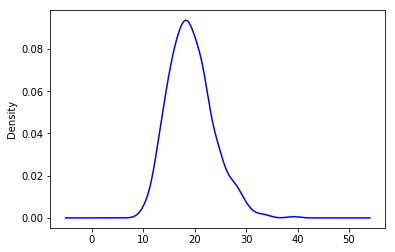

In [16]:
X['mean_texture'].plot('density',color='Blue')

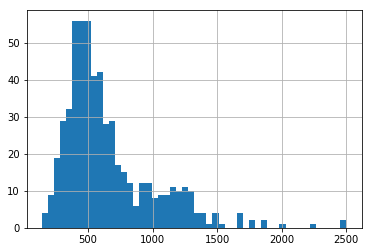

In [17]:
X['mean_area'].hist(bins=50)

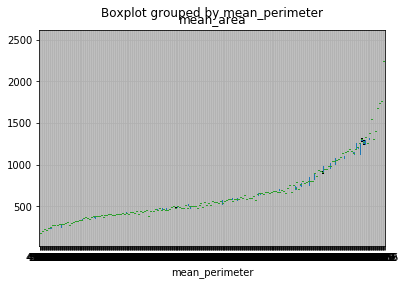

In [18]:
X.boxplot(column='mean_area',by='mean_perimeter')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


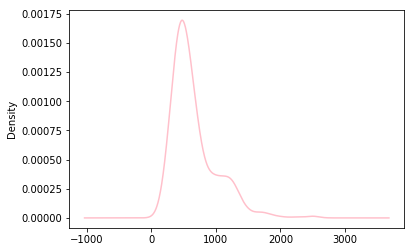

In [19]:
X['mean_area'].plot('density',color='Pink')

In [20]:
X.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
                                

In [22]:
from sklearn.svm import SVC
p=SVC()
p.fit(X_train,y_train)
p.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6140350877192983

In [23]:
from sklearn.tree import DecisionTreeClassifier
k=DecisionTreeClassifier()
k.fit(X_train,y_train)
k.score(X_test,y_test)

0.868421052631579

In [24]:
from sklearn.ensemble import RandomForestClassifier
n=RandomForestClassifier()
n.fit(X_train,y_train)
n.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9210526315789473

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
o=ExtraTreesClassifier()
o.fit(X_train,y_train)
o.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9035087719298246

In [26]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(X_train,y_train)
LG.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9210526315789473

In [27]:
from sklearn.neighbors import KNeighborsClassifier
r=KNeighborsClassifier()
r.fit(X_train,y_train)
r.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8947368421052632

In [28]:
#save model
import pickle 
file_name='Cancer.sav'
tuples=(n,X)
pickle.dump(tuples,open(file_name,'wb'))

In [29]:
from sklearn.metrics import confusion_matrix
ycm1=p.predict(X_test)
result=confusion_matrix(y_test,ycm1)
result

array([[ 5, 44],
       [ 0, 65]])

In [30]:
from sklearn.metrics import confusion_matrix
ycm2=k.predict(X_test)
result1=confusion_matrix(y_test,ycm2)
result1

array([[42,  7],
       [ 8, 57]])

In [31]:
from sklearn.metrics import confusion_matrix
ycm3=n.predict(X_test)
result2=confusion_matrix(y_test,ycm3)
result2

array([[43,  6],
       [ 3, 62]])

In [32]:
from sklearn.metrics import confusion_matrix
ycm4=o.predict(X_test)
result3=confusion_matrix(y_test,ycm4)
result3

array([[41,  8],
       [ 3, 62]])

In [33]:
from sklearn.metrics import confusion_matrix
ycm5=LG.predict(X_test)
result4=confusion_matrix(y_test,ycm5)
result4

array([[43,  6],
       [ 3, 62]])

In [34]:
from sklearn.metrics import confusion_matrix
ycm6=r.predict(X_test)
result5=confusion_matrix(y_test,ycm6)
result5

array([[41,  8],
       [ 4, 61]])

In [35]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,k.predict_proba(X_test)[:,1])

In [36]:
fpr

array([0.        , 0.14285714, 1.        ])

In [37]:
tpr

array([0.        , 0.87692308, 1.        ])

In [38]:
threshold

array([2., 1., 0.])

In [39]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr1,tpr1,threshold1=roc_curve(y_test,n.predict_proba(X_test)[:,1])

In [40]:
fpr1

array([0.        , 0.        , 0.02040816, 0.02040816, 0.04081633,
       0.12244898, 0.14285714, 0.20408163, 0.20408163, 0.24489796,
       0.28571429, 1.        ])

In [41]:
tpr1

array([0.        , 0.63076923, 0.76923077, 0.87692308, 0.90769231,
       0.95384615, 0.95384615, 0.96923077, 0.98461538, 1.        ,
       1.        , 1.        ])

In [42]:
threshold1

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [43]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr2,tpr2,threshold2=roc_curve(y_test,o.predict_proba(X_test)[:,1])

In [44]:
fpr2

array([0.        , 0.        , 0.02040816, 0.04081633, 0.12244898,
       0.16326531, 0.20408163, 0.20408163, 0.30612245, 0.32653061,
       1.        ])

In [45]:
tpr2

array([0.        , 0.56923077, 0.78461538, 0.89230769, 0.89230769,
       0.95384615, 0.98461538, 1.        , 1.        , 1.        ,
       1.        ])

In [46]:
threshold2

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.4, 0.3, 0.2, 0.1, 0. ])

In [47]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr3,tpr3,threshold3=roc_curve(y_test,LG.predict_proba(X_test)[:,1])

In [48]:
fpr3

array([0.        , 0.        , 0.        , 0.02040816, 0.02040816,
       0.04081633, 0.04081633, 0.06122449, 0.06122449, 0.10204082,
       0.10204082, 0.12244898, 0.12244898, 0.18367347, 0.18367347,
       1.        ])

In [49]:
tpr3

array([0.        , 0.01538462, 0.72307692, 0.72307692, 0.87692308,
       0.87692308, 0.90769231, 0.90769231, 0.92307692, 0.92307692,
       0.93846154, 0.93846154, 0.98461538, 0.98461538, 1.        ,
       1.        ])

In [50]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr4,tpr4,threshold4=roc_curve(y_test,r.predict_proba(X_test)[:,1])

In [51]:
fpr4

array([0.        , 0.04081633, 0.14285714, 0.16326531, 0.18367347,
       0.36734694, 1.        ])

In [52]:
tpr4

array([0.        , 0.67692308, 0.83076923, 0.93846154, 0.96923077,
       1.        , 1.        ])

In [53]:
threshold4

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [54]:
roc_auc1=roc_auc_score(y_test,k.predict(X_test))
roc_auc2=roc_auc_score(y_test,n.predict(X_test))
roc_auc3=roc_auc_score(y_test,o.predict(X_test))
roc_auc4=roc_auc_score(y_test,LG.predict(X_test))
roc_auc5=roc_auc_score(y_test,r.predict(X_test))
print(roc_auc1,'',roc_auc2,'',roc_auc3,'',roc_auc4,'',roc_auc5)

0.8670329670329671  0.9156985871271586  0.8952904238618525  0.9156985871271586  0.8875981161695448


In [55]:
yPPPPP=o.predict_proba(X_test)

In [56]:
yPPPPP

array([[0. , 1. ],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0.2, 0.8],
       [1. , 0. ],
       [0.3, 0.7],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.7,

In [57]:
from sklearn.preprocessing import binarize
wcv=binarize(yPPPPP,0.60)
wcv

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.

In [58]:
LOC=wcv[:,1]

In [59]:
TYPE=LOC.astype(int)

In [60]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(y_test,TYPE)

In [61]:
CF

array([[43,  6],
       [ 7, 58]])

In [62]:
from sklearn.preprocessing import binarize
wcv=binarize(yPPPPP,0.70)
wcv

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.

In [63]:
LOC=wcv[:,1]

In [64]:
TYPE=LOC.astype(int)

In [65]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(y_test,TYPE)
CF

array([[47,  2],
       [ 7, 58]])

In [66]:
from sklearn.preprocessing import binarize
wcv=binarize(yPPPPP,0.70)
wcv

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.

In [67]:
from sklearn.preprocessing import binarize
wcv=binarize(yPPPPP,0.80)
wcv

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.

In [68]:
LOC=wcv[:,1]

In [69]:
TYPE=LOC.astype(int)

In [70]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(y_test,TYPE)
CF

array([[48,  1],
       [14, 51]])

In [71]:
from sklearn.preprocessing import binarize
wcv=binarize(yPPPPP,0.90)
wcv

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.

In [72]:
LOC=wcv[:,1]

In [73]:
TYPE=LOC.astype(int)

In [74]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(y_test,TYPE)
CF

array([[49,  0],
       [28, 37]])